# Welly Multi Well Projects

In [86]:
from welly import Project
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
# Loading wells using Project
wells = Project.from_las('welly_data/*.las')

0it [00:00, ?it/s]/Users/andy/opt/anaconda3/lib/python3.8/site-packages/welly/well.py:193: FutureWarning: From v0.5 the default will be 'original', keeping whatever is used in the LAS file. If you want to force conversion to metres, change your code to use `index='m'`.
  warnings.warn(m, FutureWarning)
/Users/andy/opt/anaconda3/lib/python3.8/site-packages/welly/curve.py:216: UserWarning: Irregular sampling in depth is not supported. Interpolating to regular basis.
  warnings.warn(m)
4it [00:06,  1.56s/it]


### Well Meta Data

In [88]:
#Viewing contents of wells
wells

Index,UWI,Data,Curves
0,L06-06,5 curves,"GR, DT, RHOB, DRHO, NPHI"
1,L07-01,4 curves,"GR, DT, RHOB, NPHI"
2,L05-B-01,5 curves,"GR, DT, RHOB, DRHO, NPHI"
3,L06-07,5 curves,"GR, DT, RHOB, DRHO, NPHI"


In [89]:
# Call upon UWIs
wells.uwis

['L06-06', 'L07-01', 'L05-B-01', 'L06-07']

In [90]:
# Print individual well details
for well in wells:
    print(well)

Well(uwi: 'L06-06', 5 curves: ['GR', 'DT', 'RHOB', 'DRHO', 'NPHI'])
Well(uwi: 'L07-01', 4 curves: ['GR', 'DT', 'RHOB', 'NPHI'])
Well(uwi: 'L05-B-01', 5 curves: ['GR', 'DT', 'RHOB', 'DRHO', 'NPHI'])
Well(uwi: 'L06-07', 5 curves: ['GR', 'DT', 'RHOB', 'DRHO', 'NPHI'])


In [91]:
# Print well name and location
for well in wells:
    print(f'{well.header.name} \t {well.location.latitude} \t {well.location.longitude}'.expandtabs(10))

L06-06     53.808408           4.672192
L07-01     53.722768           4.796468
L05-B-01   53.705031           4.603479
L06-07     53.706549           4.898703


In [92]:
# Create a dataframe of well header information

well_dict = {}
for well in wells:
    well_dict[well.uwi] = {'well name':well.header.name, 
                          'Latitude':well.location.latitude,
                          'Longitude':well.location.longitude}

wells_df = pd.DataFrame.from_dict(well_dict, orient='index')

wells_df.reset_index(inplace=True)

wells_df.rename(columns={'index':'UWI'}, inplace=True)



In [93]:
wells_df

,UWI,well name,Latitude,Longitude
0,L06-06,L06-06,53.808408,4.672192
1,L07-01,L07-01,53.722768,4.796468
2,L05-B-01,L05-B-01,53.705031,4.603479
3,L06-07,L06-07,53.706549,4.898703


## Mapping the Well Locations

In [94]:
import folium

In [108]:
mean_lat = wells_df['Latitude'].mean()
mean_long = wells_df['Longitude'].mean()

m = folium.Map(location=[mean_lat, mean_long],zoom_start=7)

for index, well_location in wells_df.iterrows():
    folium.Marker([well_location['Latitude'], well_location['Longitude']],
                 popup=well_location['well name']).add_to(m)
m

## Plotting Curves from Multiple Wells

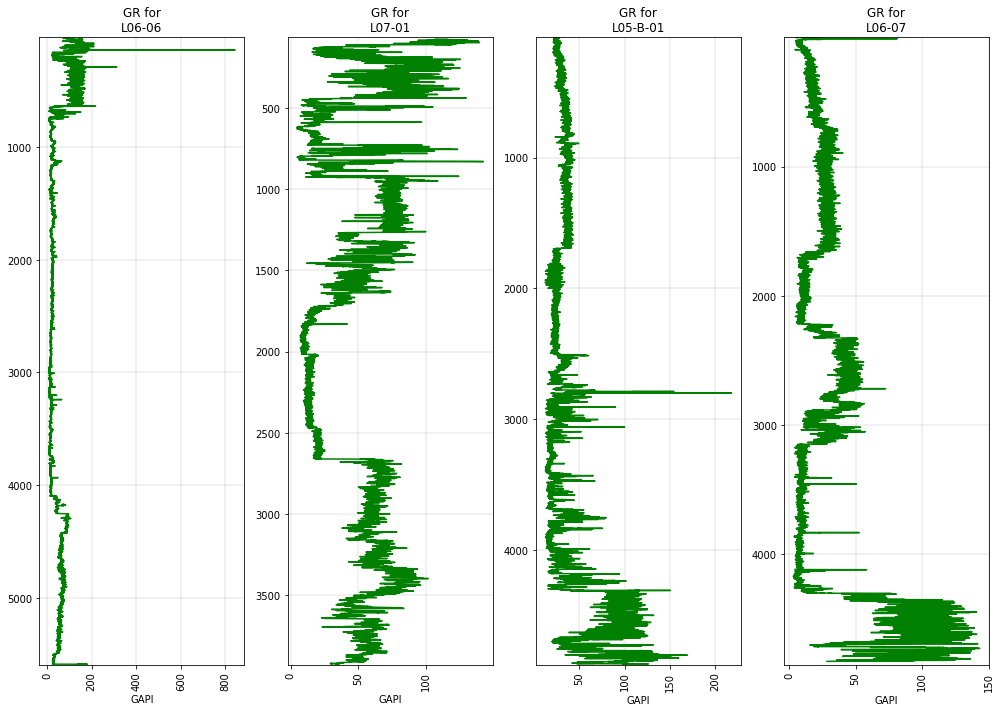

In [114]:
#Plot GR from all wells
fig, axs = plt.subplots(figsize=(14, 10), ncols=len(wells))

for i, (ax, well) in enumerate(zip(axs, wells)):
    gr = well.get_curve('GR')
    if gr is not None:
        ax = gr.plot(ax=ax, c='green')
    ax.set_title(f"GR for\n{well.header.name}")

plt.tight_layout()
plt.show()

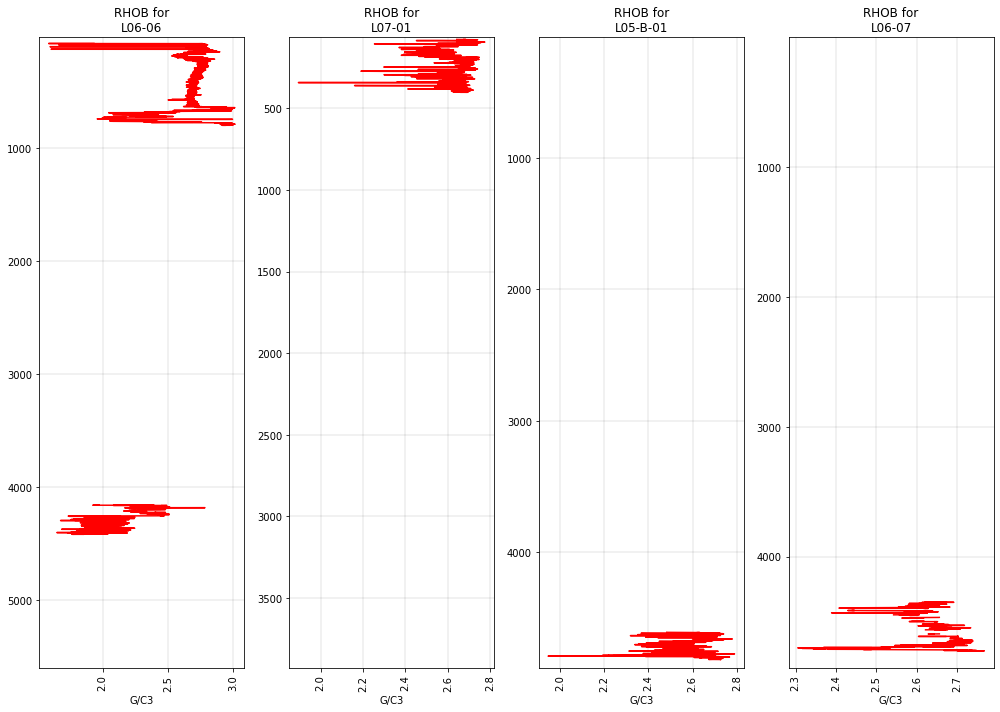

In [113]:
fig, axs = plt.subplots(figsize=(14, 10), ncols=len(wells))

curve_name = 'RHOB'

for i, (ax, well) in enumerate(zip(axs, wells)):
    gr = well.get_curve(curve_name)
    if gr is not None:
        ax = gr.plot(ax=ax, c='red')
    ax.set_title(f"{curve_name} for\n{well.header.name}")

plt.tight_layout()
plt.show()

## Well Log Data Quality

In [67]:
import welly.quality as wq
from IPython.display import HTML

In [68]:
tests = {'Each': [wq.no_flat,
                 wq.no_gaps,
                 wq.not_empty],
        'GR': [
                wq.all_positive,
                wq.all_between(0, 250),
                wq.check_units(['API', 'GAPI']),
        ],
        'RHOB': [
                wq.all_positive,
                wq.all_between(1.5, 3),
                wq.check_units(['G/CC', 'g/cm3']),
        ]}

In [69]:
data_qc_table = wells.curve_table_html(keys=['GR', 'RHOB'], tests=tests)
HTML(data_qc_table)

In [73]:
qc_dict = {}
for well in wells:
    qc_dict[well.header.name] = well.qc_table_html(tests)
    

In [76]:
HTML(qc_dict['L06-06'])

Curve,Passed,Score,check_units,no_gaps,no_flat,all_between,all_positive,not_empty
GR,4 / 6,0.667,True,False,True,False,True,True
DT,2 / 3,0.667,,False,True,,,True
RHOB,3 / 6,0.500,False,False,True,False,True,True
DRHO,2 / 3,0.667,,False,True,,,True
NPHI,2 / 3,0.667,,False,True,,,True


In [77]:
HTML(qc_dict['L07-01'])

Curve,Passed,Score,check_units,no_gaps,no_flat,all_between,all_positive,not_empty
GR,5 / 6,0.833,True,False,True,True,True,True
DT,2 / 3,0.667,,False,True,,,True
RHOB,5 / 6,0.833,False,True,True,True,True,True
NPHI,3 / 3,1.000,,True,True,,,True


## Well Data to Dataframe

In [109]:
df = wells.df()

In [117]:
df

GR  DT  RHOB  DRHO  NPHI
UWI    Depth                           
L06-06 25.2   NaN NaN   NaN   NaN   NaN
       25.3   NaN NaN   NaN   NaN   NaN
       25.4   NaN NaN   NaN   NaN   NaN
       25.5   NaN NaN   NaN   NaN   NaN
       25.6   NaN NaN   NaN   NaN   NaN
...            ..  ..   ...   ...   ...
L06-07 4855.7 NaN NaN   NaN   NaN   NaN
       4855.8 NaN NaN   NaN   NaN   NaN
       4855.9 NaN NaN   NaN   NaN   NaN
       4856.0 NaN NaN   NaN   NaN   NaN
       4856.1 NaN NaN   NaN   NaN   NaN

[190880 rows x 5 columns]

In [112]:
df.loc['L06-06']

,GR,DT,RHOB,DRHO,NPHI
Depth,,,,,
25.2,NaN,NaN,NaN,NaN,NaN
25.3,NaN,NaN,NaN,NaN,NaN
25.4,NaN,NaN,NaN,NaN,NaN
25.5,NaN,NaN,NaN,NaN,NaN
25.6,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
5594.6,136.702515,NaN,NaN,NaN,NaN
5594.7,137.528931,NaN,NaN,NaN,NaN
5594.8,NaN,NaN,NaN,NaN,NaN
